In [12]:
import sys
import ROOT as r
import uproot
import awkward as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from array import array as arr

%jsroot on

In [53]:
#fin = r.TFile.Open("/nashome/m/micarrig/icarus/NuE/pi0_v2.root", "READ")
fin = r.TFile.Open("/nashome/m/micarrig/icarus/NuE/pionOutputs/MCv2/pionMC.root", "READ")

In [54]:
h_truthNue = fin.Get("fid/seqPlots/seqNoCut_NumSignal")
truth_nue = h_truthNue.GetBinContent(7)
truth_nue

458499.7163671874

In [55]:
n_signal = []
n_1MuNPi = []
n_nue = []
n_numu = []
n_nc = []
n_cosmic = []
n_all = []
n_true = []

dir = fin.Get("s1Mu1Pi0/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    if not "tNueEnergy" in key.GetName(): continue
    print(key)
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        n_signal.append(obj.Integral(0, obj.GetNbinsX()+1))

dir = fin.Get("b1MuNPi0/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        n_1MuNPi.append(obj.Integral(0, obj.GetNbinsX()+1))

dir = fin.Get("bNuE/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        n_nue.append(obj.Integral(0, obj.GetNbinsX()+1))

dir = fin.Get("bNuMu/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        n_numu.append(obj.Integral(0, obj.GetNbinsX()+1))
        
dir = fin.Get("allEvents/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        n_all.append(obj.Integral(0, obj.GetNbinsX()+1))

dir = fin.Get("bNC/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        n_nc.append(obj.Integral(0, obj.GetNbinsX()+1))

dir = fin.Get("bCosmic/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        n_cosmic.append(obj.Integral(0, obj.GetNbinsX()+1))

dir = fin.Get("fid/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        n_true.append(obj.GetBinContent(7))

Name: seqNoCut_tNueEnergy Title: 
Name: seqFiducial_tNueEnergy Title: 
Name: seqchargedPionVeto_tNueEnergy Title: 
Name: seqBarycenter_tNueEnergy Title: 
Name: seqMuonTrack_tNueEnergy Title: 
Name: seqMuonDeltaTrkVertex_tNueEnergy Title: 
Name: seqMuonCollectionHits_tNueEnergy Title: 
Name: seqMuonChi2_tNueEnergy Title: 
Name: seqMuonTrkLen_tNueEnergy Title: 
Name: seqPhotonCandidates_tNueEnergy Title: 
Name: seqShowersContained_tNueEnergy Title: 
Name: seqprimaryPhotonEnergy_tNueEnergy Title: 
Name: seqsecondaryPhotonEnergy_tNueEnergy Title: 
Name: seqnShowers_tNueEnergy Title: 


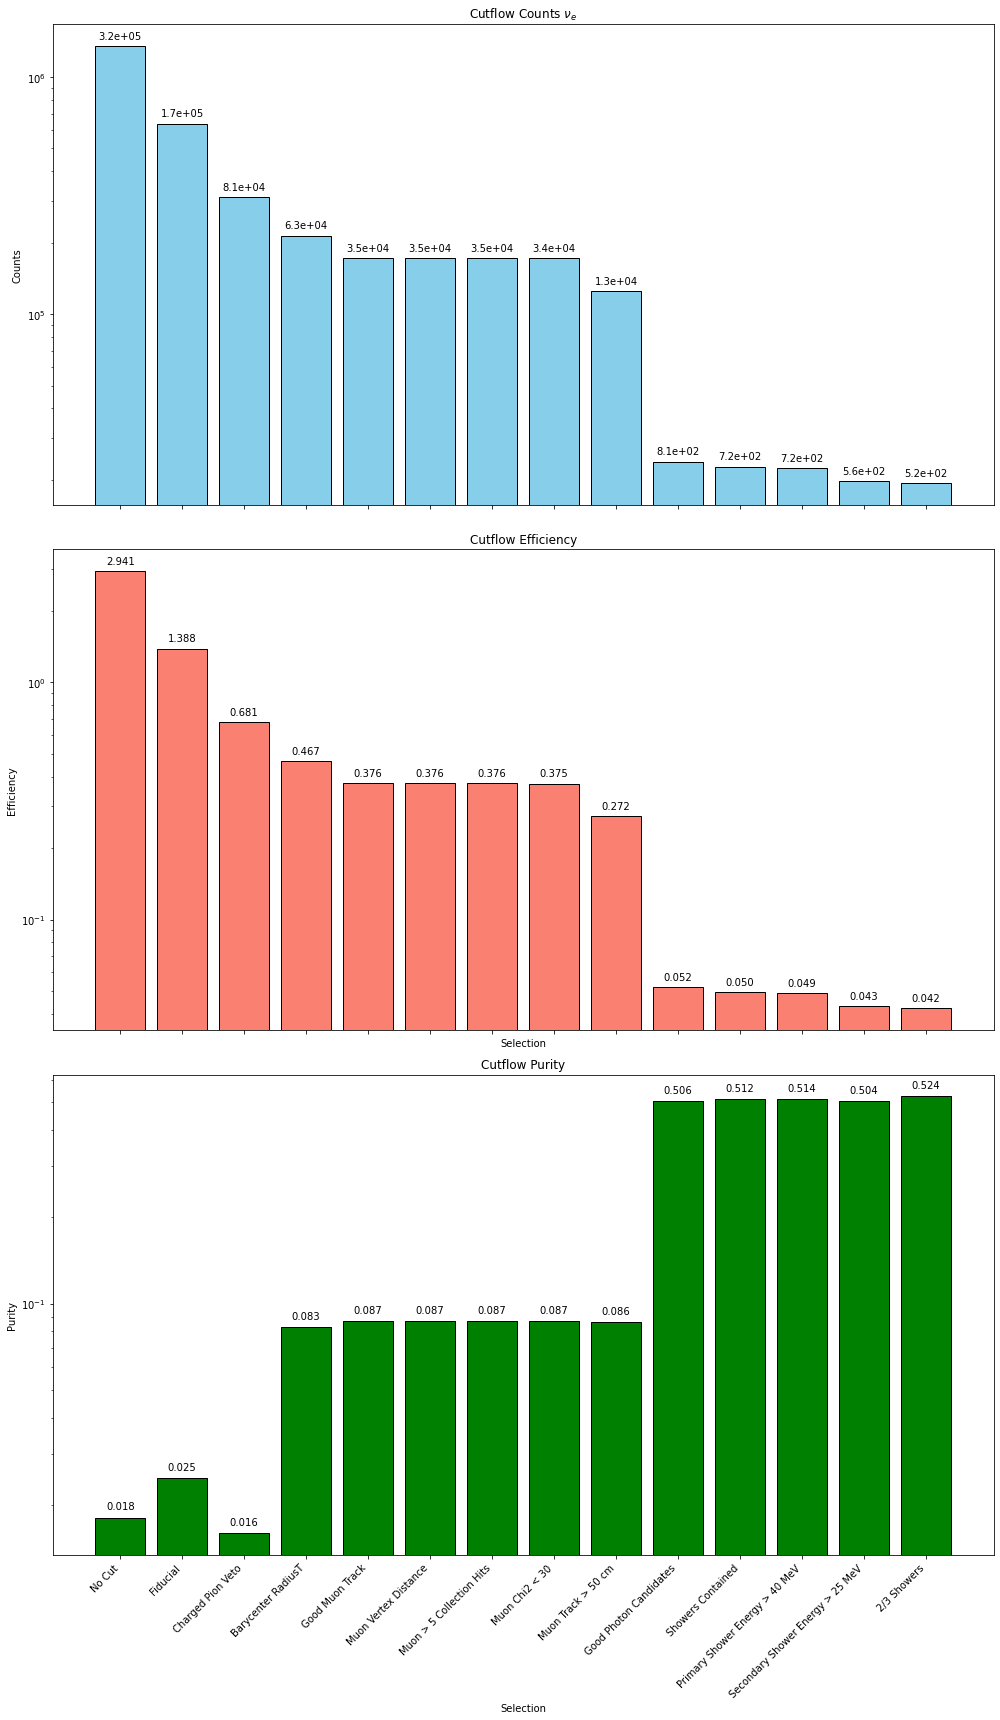

In [56]:
# Example data
labels = {"NoCut": "No Cut", "Fiducial": "Fiducial", "ChargedPionVeto": "Charged Pion Veto", "BarycenterRadiusT": "Barycenter RadiusT", "MuonTrack": "Good Muon Track", "MuonDeltaTrkVertex": "Muon Vertex Distance",
    "MuonCollectionHits": "Muon > 5 Collection Hits", "MuonChi2": "Muon Chi2 < 30", "MuonTrkLen": "Muon Track > 50 cm", 
    "PhotonCandidates": "Good Photon Candidates", "ShowersContained": "Showers Contained", "primaryPhotonEnergy": "Primary Shower Energy > 40 MeV", "secondaryPhotonEnergy": "Secondary Shower Energy > 25 MeV", 
    "nShowers": "2/3 Showers"}

eff = [x/n_true[0] for x in n_signal]
purity = [x/n_all[i] for i, x in enumerate(n_signal)]

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(14, 24), sharex=True)

#Top plot
bars1 = ax1.bar(range(len(n_signal)), n_signal, edgecolor="black", color="skyblue")
ax1.set_yscale("log")
ax1.set_ylabel("Counts")
ax1.set_title(r"Cutflow Counts $\nu_e$")
for bar, val in zip(bars1, n_nue):
   height = bar.get_height()
   ax1.text(bar.get_x() + bar.get_width()/2, height*1.05, f"{val:.1e}", ha='center', va='bottom')

# Bottom plot
bars2 = ax2.bar(range(len(eff)), eff, edgecolor="black", color="salmon")
ax2.set_yscale("log")
ax2.set_xlabel("Selection")
ax2.set_ylabel("Efficiency")
ax2.set_title("Cutflow Efficiency")
for bar, val in zip(bars2, eff):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height*1.05, f"{val:.3f}", ha='center', va='bottom')

# Bottom plot
bars3 = ax3.bar(range(len(purity)), purity, edgecolor="black", color="green")
ax3.set_yscale("log")
ax3.set_xlabel("Selection")
ax3.set_ylabel("Purity")
ax3.set_title("Cutflow Purity")
for bar, val in zip(bars3, purity):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height*1.05, f"{val:.3f}", ha='center', va='bottom')

# Set x-axis labels
ax3.set_xticks(range(len(labels.keys())))
ax3.set_xticklabels(labels.values(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [57]:
signal_seqPlots = {}
muNpi_seqPlots = {}
numu_seqPlots = {}
nue_seqPlots = {}
nc_seqPlots = {}
cosmic_seqPlots = {}
all_seqPlots = {}

dir = fin.Get("s1Mu1Pi0/seqPlots")
# Loop over keys
for key in dir.GetListOfKeys():
    print(key)
    #if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1") and not obj.InheritsFrom("TH2"):
        obj.SetName(key.GetName())
        signal_seqPlots[key.GetName()] = obj

dir = fin.Get("b1MuNPi0/seqPlots")
# Loop over keys
for key in dir.GetListOfKeys():
    #if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1") and not obj.InheritsFrom("TH2"):
        obj.SetName(key.GetName())
        muNpi_seqPlots[key.GetName()] = obj

dir = fin.Get("allEvents/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    #if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1") and not obj.InheritsFrom("TH2"):
        obj.SetName(key.GetName())
        all_seqPlots[key.GetName()] = obj

dir = fin.Get("bNuE/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    #if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1") and not obj.InheritsFrom("TH2"):
        obj.SetName(key.GetName())
        nue_seqPlots[key.GetName()] = obj

dir = fin.Get("bNuMu/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    #if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1") and not obj.InheritsFrom("TH2"):
        obj.SetName(key.GetName())
        numu_seqPlots[key.GetName()] = obj

dir = fin.Get("bNC/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    #if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1") and not obj.InheritsFrom("TH2"):
        obj.SetName(key.GetName())
        nc_seqPlots[key.GetName()] = obj

dir = fin.Get("bCosmic/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    #if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1") and not obj.InheritsFrom("TH2"):
        obj.SetName(key.GetName())
        cosmic_seqPlots[key.GetName()] = obj

for val in numu_seqPlots.values():
    val.SetLineColor(r.kRed)

for val in nc_seqPlots.values():
    val.SetLineColor(r.kBlue)

for val in cosmic_seqPlots.values():
    val.SetLineColor(r.kGreen)

Name: seqNoCut_tNueEnergy Title: 
Name: seqFiducial_tNueEnergy Title: 
Name: seqchargedPionVeto_tNueEnergy Title: 
Name: seqBarycenter_tNueEnergy Title: 
Name: seqMuonTrack_tNueEnergy Title: 
Name: seqMuonDeltaTrkVertex_tNueEnergy Title: 
Name: seqMuonCollectionHits_tNueEnergy Title: 
Name: seqMuonChi2_tNueEnergy Title: 
Name: seqMuonTrkLen_tNueEnergy Title: 
Name: seqPhotonCandidates_tNueEnergy Title: 
Name: seqShowersContained_tNueEnergy Title: 
Name: seqprimaryPhotonEnergy_tNueEnergy Title: 
Name: seqsecondaryPhotonEnergy_tNueEnergy Title: 
Name: seqnShowers_tNueEnergy Title: 
Name: seqNoCut_rShowerEnergy Title: 
Name: seqFiducial_rShowerEnergy Title: 
Name: seqchargedPionVeto_rShowerEnergy Title: 
Name: seqBarycenter_rShowerEnergy Title: 
Name: seqMuonTrack_rShowerEnergy Title: 
Name: seqMuonDeltaTrkVertex_rShowerEnergy Title: 
Name: seqMuonCollectionHits_rShowerEnergy Title: 
Name: seqMuonChi2_rShowerEnergy Title: 
Name: seqMuonTrkLen_rShowerEnergy Title: 
Name: seqPhotonCandidate

In [58]:
v_seqPlots = {r"1#mu1#pi0": signal_seqPlots, r"1#muN#pi0": muNpi_seqPlots, r"#nu_{e}": nue_seqPlots, r"#nu_{#mu}": numu_seqPlots, r"nc": nc_seqPlots, r"cosmic": cosmic_seqPlots}

labels = {"NoCut": "No Cut", "Fiducial": "Fiducial", "chargedPionVeto":"Charged Pion Veto", "Barycenter": "Barycenter", "MuonTrack": "Good Muon Track", "MuonDeltaTrkVertex": "Muon Vertex Distance",
    "MuonCollectionHits": "Muon > 5 Collection Hits", "MuonChi2": "Muon Chi2 < 30", "MuonTrkLen": "Muon Track > 50 cm", 
    "PhotonCandidates": "Good Photon Candidates", "ShowersContained": "Showers Contained", "primaryPhotonEnergy": "Primary Shower Energy > 25 MeV", "secondaryPhotonEnergy": "Secondary Shower Energy > 25 MeV", 
    "nShowers": "2 Showers"}


fout = r.TFile.Open("pi0Combined.root", "RECREATE")

n = len(labels.keys())

totalEvents = 1

df_seq = pd.DataFrame({
    "selection": pd.Series(index=range(n), dtype="string"),
    r"1#mu1#pi0": pd.Series(index=range(n), dtype="float64"),
    r"1#muN#pi0": pd.Series(index=range(n), dtype="float64"),
    r"#nu_{e}": pd.Series(index=range(n), dtype="float64"),
    r"#nu_{#mu}": pd.Series(index=range(n), dtype="float64"),
    "nc": pd.Series(index=range(n), dtype="float64"),
    "cosmic": pd.Series(index=range(n), dtype="float64"),
})

c1 = r.TCanvas("c1", "c1", 800, 600)
l = r.TLegend(0.7, 0.7, 0.9, 0.9)
for i, key in enumerate(nue_seqPlots.keys()):
    #if i > 0: break
    l.Clear()
    drawS = "hist"
    maxY = -1
    totalEvents = all_seqPlots[key].Integral(0, all_seqPlots[key].GetNbinsX()+1)
    if totalEvents == 0: totalEvents = 1e-10
    label = labels[key.split('_')[0].replace('seq', '')]
    if i < len(labels.keys()): df_seq.at[i, 'selection'] = label
    for n, p in v_seqPlots.items():
        p[key].Draw(drawS)
        drawS += " same"
        if p[key].GetMaximum() > maxY : maxY = p[key].GetMaximum()
        purity = p[key].Integral(0, p[key].GetNbinsX()+1) / totalEvents        
        l.AddEntry(p[key], f'{n} p={purity:.2f}', 'l')
        if i < len(labels.keys()):
            df_seq.at[i, n] = p[key].Integral(0, p[key].GetNbinsX()+1)
    v_seqPlots[r"1#mu1#pi0"][key].GetYaxis().SetRangeUser(0, maxY*1.1)
    t1 = r.TLatex()
    t1.SetNDC()  # Use normalized coordinates (0-1)
    t1.SetTextSize(0.04)
    t1.DrawLatex(0.2, 0.8, f"Sequential: {label}")  # x, y in NDC
    l.Draw()
    c1.Update()
    fout.cd()
    c1.Write(key)

fout.Close()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [59]:
fData = r.TFile.Open("/nashome/m/micarrig/icarus/NuE/pionOutputs/pionTotal.root", "READ")

dataPlots = {}
dataNM1 = {}

dir = fData.Get("allEvents/seqPlots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    #if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        obj.SetName(key.GetName())
        dataPlots[key.GetName()] = obj

dir = fData.Get("allEvents/nm1Plots")  # or f if top-level
# Loop over keys
for key in dir.GetListOfKeys():
    #if not "tNueEnergy" in key.GetName(): continue
    obj = key.ReadObj()
    # Check if it is a histogram
    if obj.InheritsFrom("TH1"):
        obj.SetName(key.GetName())
        dataNM1[key.GetName()] = obj



In [60]:
fout = r.TFile.Open("/nashome/m/micarrig/icarus/NuE/pi0CombinedTest.root", "RECREATE")

n = len(labels.keys())

#print(r.TColor.GetColor("#5790fc"))
r.gStyle.SetPalette(r.kBird)
ncolors = r.gStyle.GetNumberOfColors()

# = [r.kAzure-2, r.kOrange-2, r.kRed+2, r.kGray+1, r.kViolet-1, r.kOrange-7, r.kOrange+7, r.kYellow-2, r.kGray+2, r.kCyan-9]
colors = [r.kBlue+2, r.kAzure+7, r.kGreen+3, r.kGreen-6, r.kOrange-1, r.kYellow-4]
colors = [r.kOrange+8, r.kViolet, r.kBlue+2, r.kAzure+7, r.kGreen-2, r.kYellow-4]


c1 = r.TCanvas("c1", "c1", 800, 600)
l = r.TLegend(0.7, 0.7, 0.9, 0.9)
for i, key in enumerate(nue_seqPlots.keys()):
    #if i > 0: break
    l.Clear()
    drawS = "hist"
    maxY = -1
    if (i+1) % len(labels) != 0: continue
    totalEvents = all_seqPlots[key].Integral(0, all_seqPlots[key].GetNbinsX()+1)
    if totalEvents == 0: totalEvents = 1e-10
    label = labels[key.split('_')[0].replace('seq', '')]
    h_stack = r.THStack("h_stack", "")

    mcI = 0  
    dataI = dataPlots[key].Integral(0, dataPlots[key].GetNbinsX()+1)
    for idx, (n, p) in enumerate(v_seqPlots.items()):
        mcI += p[key].Integral(0, p[key].GetNbinsX()+1)
    scale = dataI / mcI

    for idx, (n, p) in enumerate(v_seqPlots.items()):
        if (idx == 0):
            h_stack.SetTitle(f";{p[key].GetXaxis().GetTitle()};{p[key].GetYaxis().GetTitle()}")
        this_h = p[key].Clone()
        this_h.SetLineColor(r.kBlack)
        this_h.Scale(scale)
        this_h.SetFillColor(colors[idx])
        this_h.Rebin(2)
        h_stack.Add(this_h)
        if p[key].GetMaximum() > maxY : maxY = p[key].GetMaximum()
        purity = p[key].Integral(0, p[key].GetNbinsX()+1) / totalEvents        
        l.AddEntry(this_h, f'{n} p={purity:.2f}', 'F')

    maxVal = h_stack.GetMaximum()
    if dataPlots[key].GetMaximum() > maxVal: maxVal = dataPlots[key].GetMaximum()
    maxVal *= 2
    h_stack.SetMaximum(maxVal)
    h_stack.Draw("hist")
    c1.Update()
    dataPlots[key].SetMarkerStyle(21)
    dataPlots[key].Rebin(2)
    dataPlots[key].Draw("same PE")
    l.AddEntry(dataPlots[key], "Data", "P")
    r.gPad.Update()
    l.Draw()
    c1.Update()
    fout.cd()
    c1.Write(key.split('_')[-1]+"Stacked")

fout.Close()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TH1D::Rebin>: ngroup=2 is not an exact divider of nbins=3.
Warning in <TH1D::Rebin>: ngroup=2 is not an exact divider of nbins=3.
Warning in <TH1D::Rebin>: ngroup=2 is not an exact divider of nbins=3.
Warning in <TH1D::Rebin>: ngroup=2 is not an exact divider of nbins=3.
Warning in <TH1D::Rebin>: ngroup=2 is not an exact divider of nbins=3.
Warning in <TH1D::Rebin>: ngroup=2 is not an exact divider of nbins=3.
Warning in <TH1D::Rebin>: ngroup=2 is not an exact divider of nbins=3.


In [61]:
df_seq.columns = ["Selection", "1#mu1#pi0", "1#muN#pi0", "nue", "numu", "nc", "cosmic"]

#df_nm1.columns = ["Selection", "nue", "numu", "nc", "cosmic"]

In [62]:
df_seq['Background'] = df_seq['1#muN#pi0'] + df_seq['nue'] + df_seq["numu"] + df_seq["nc"] + df_seq["cosmic"]
df_seq["Total"] = df_seq["Background"] + df_seq["1#mu1#pi0"]
df_seq['Purity'] = df_seq['1#mu1#pi0'] / df_seq['Total']
df_seq["Delta Purity"] = df_seq["Purity"] - df_seq["Purity"].shift(1)
df_seq['Efficiency'] = df_seq['1#mu1#pi0'] / truth_nue
df_seq["Delta Efficiency"] = df_seq["Efficiency"] - df_seq["Efficiency"].shift(1)
df_seq.round(3)

,Selection,1#mu1#pi0,1#muN#pi0,nue,numu,nc,cosmic,Background,Total,Purity,Delta Purity,Efficiency,Delta Efficiency
0,No Cut,1348565.945,314064.399,315124.646,5742048.703,1659272.528,6.529171e+07,7.332222e+07,7.467078e+07,0.018,NaN,2.941,NaN
1,Fiducial,636616.571,138911.190,172023.581,2813011.466,971884.494,2.105895e+07,2.515478e+07,2.579140e+07,0.025,0.007,1.388,-1.553
2,Charged Pion Veto,312009.831,61514.541,80651.000,1870538.392,703558.133,1.659822e+07,1.931448e+07,1.962649e+07,0.016,-0.009,0.681,-0.708
3,Barycenter,214244.834,42216.860,62594.134,1436114.429,541684.763,2.839715e+05,2.366582e+06,2.580827e+06,0.083,0.067,0.467,-0.213
4,Good Muon Track,172491.698,31529.580,34794.601,1247044.764,255848.185,2.471922e+05,1.816409e+06,1.988901e+06,0.087,0.004,0.376,-0.091
5,Muon Vertex Distance,172491.698,31529.580,34794.601,1247044.764,255848.185,2.471922e+05,1.816409e+06,1.988901e+06,0.087,0.000,0.376,0.000
6,Muon > 5 Collection Hits,172491.698,31529.580,34794.601,1247044.764,255848.185,2.471922e+05,1.816409e+06,1.988901e+06,0.087,0.000,0.376,0.000
7,Muon Chi2 < 30,171721.915,31368.842,34313.371,1244065.686,253344.903,2.464643e+05,1.809557e+06,1.981279e+06,0.087,-0.000,0.375,-0.002
8,Muon Track > 50 cm,124719.601,19200.642,13262.554,1021228.683,79502.716,1.880848e+05,1.321279e+06,1.445999e+06,0.086,-0.000,0.272,-0.103
9,Good Photon Candidates,23861.302,9492.226,805.231,6748.110,5474.212,8.057190e+02,2.332550e+04,4.718680e+04,0.506,0.419,0.052,-0.220


In [63]:
c1 = r.TCanvas("c1", "c1", 800, 600)

combined = r.TFile.Open("/nashome/m/micarrig/icarus/NuE/pi0CombinedTest.root", "READ")

c_pi0Mass = combined.Get("Pi0MassStacked")

for h in c_pi0Mass.GetListOfPrimitives():
    print(h.GetName())
    # if isinstance(h, r.TH1):
    #     h.Rebin(2)

h_pi0Mass = c_pi0Mass.GetPrimitive("h_stack")
h_sum = h_pi0Mass.GetStack().Last()
f1 = r.TF1("f1", "crystalball", 0, 200)
f1.SetParameters(3000, 140, 10, 0.1, 0.001)
f1.SetParLimits(0, 200, 20000)
f1.SetParLimits(1, 0, 180)
f1.SetParLimits(2, 0, 1525)
f1.SetParLimits(3, 1e-15, 100)
f1.SetParLimits(4, 1e-15, 100)

h_sum.Fit(f1, "LEMB", "", 0, 150)

mean = h_sum.GetMean()
print("mean", mean)

#c1.cd()
#h_pi0Mass.Draw()
c_pi0Mass.Draw()
f1.Draw("same")
t1 = r.TLatex()
t2 = r.TLatex()
t1.SetTextSize(0.03)
t2.SetTextSize(0.03)
t1.DrawLatexNDC(0.2, 0.7, f'Fit Parameters: #mu={f1.GetParameter(1):.2f}')
t2.DrawLatexNDC(0.2, 0.6, f'#sigma={f1.GetParameter(2):.2f}, #alpha={f1.GetParameter(3):.2f}, N={f1.GetParameter(4):.2f}')
#c1.Draw()

#h_pi0Mass.Draw()
#c1.Draw()
#c_pi0Mass.Draw()


TFrame
h_stack
seqnShowers_Pi0Mass
TPave
mean 104.13006468561822


 FCN=125.741 FROM MINOS     STATUS=SUCCESSFUL    193 CALLS        1117 TOTAL
                     EDM=4.61681e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.79316e+03   7.16140e+01   1.56587e-06  -1.54730e-02
   2  Mean         1.16537e+02   5.46694e-01  -2.30144e-05   4.12934e-03
   3  Sigma        1.99335e+01   4.41713e-01   7.92708e-06  -1.47377e-01
   4  Alpha        5.08177e-01   3.21276e-02   2.37217e-05   1.24488e-01
   5  N            4.09423e+00   9.32888e-01   9.32888e-01   2.93648e-02
                               ERR DEF= 0.5


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [16]:
c_pi0Mass.Draw()

In [247]:
fin = uproot.open("debug.root")

signal = fin['signal/t1Mu1Pi0']
all = fin['all/allEvents']
s_branches = signal.arrays()
a_branches = all.arrays()

In [248]:
c1 = r.TCanvas("c1", "c1", 1600, 600)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [249]:
#plt.figure(figsize=(12, 10))
c1.Clear()
c1.Divide(2, 1)

nbins = 40
hrange = (0, 400)

def getSel(branches):
    sel = ((branches['rLeadingShowerE'] > 0.04) & 
        (branches['rSubLeadingShowerE'] > 0.025) & 
        (branches['rLongestTrack'] > 50) & 
        (branches['rBarycenterDeltaZT'] < 100) & 
        #(branches['rNShowers'] <= 3) & 
        (branches['rNShowers'] == 2) & 
        (branches['rShowerFiducial'] == True) & 
        (branches['rFiducial'] == True) &
        (branches['rProtonChi2'] > 60) & 
        (branches['rDeltaTrkVtx'] < 10) & 
        (branches['rNCollectionPlaneHits'] > 5) & 
        (branches['rTrkContained'] == True) &
        (branches['rMuonChi2'] < 30))
    
    return sel


sel_signal = getSel(s_branches)
sel_all = getSel(a_branches)
s_cut = s_branches['rShowerM'][sel_signal]
a_cut = a_branches['rShowerM'][sel_all]

h1 = r.TH1F("h1", "all", nbins, hrange[0], hrange[1])
h2 = r.TH1F("h2", "signal", nbins, hrange[0], hrange[1])
h3 = r.TH1F('h3', 'all cut', nbins, hrange[0], hrange[1])
h4 = r.TH1F("h4", 'signal cut', nbins, hrange[0], hrange[1])
h1.FillN(len(a_branches['rShowerM']), arr('d', a_branches['rShowerM']), np.ones(len(a_branches['rShowerM'])))
h2.FillN(len(s_branches['rShowerM']), arr('d', s_branches['rShowerM']), np.ones(len(s_branches['rShowerM'])))
h3.FillN(len(a_cut), arr('d', a_cut), np.ones(len(a_cut)))
h4.FillN(len(s_cut), arr('d', s_cut), np.ones(len(s_cut)))

f2 = r.TF1('f2', 'gaus')
f4 = r.TF1('f4', 'gaus')

h1.SetFillColorAlpha(r.kBlue, 0.3)
h2.SetFillColorAlpha(r.kRed, 0.3)
c1.cd(1)
h1.Draw()
h2.Draw("same")
h2.Fit(f2, 'LEMS', '', 50, 150)
m2 = f2.GetParameter(1)
t2 = r.TLatex()
t2.DrawLatexNDC(0.7, 0.7, f'#mu={m2:.2f}')
h3.SetFillColorAlpha(r.kBlue, 0.3)
h4.SetFillColorAlpha(r.kRed, 0.3)
c1.cd(2)
h3.Draw()
h4.Draw("same")
h4.Fit(f4, 'LEMS', '', 50, 150)
m4 = f4.GetParameter(1)
t4 = r.TLatex()
t4.DrawLatexNDC(0.7, 0.7, f'#mu={m4:.2f}')
c1.Draw()


#plt.hist(branches['rShowerM'], nbins, hrange, alpha=0.2, label="No Sel", color="blue", edgecolor=None)
#plt.hist(cut, nbins, hrange, alpha=0.2, label="Sel", color="red", edgecolor=None)
#plt.legend()

 FCN=7.05962 FROM MINOS     STATUS=SUCCESSFUL     73 CALLS         358 TOTAL
                     EDM=1.16827e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.13323e+02   5.30214e+00   3.25576e-02   4.42069e-06
   2  Mean         8.91757e+01   2.02762e+00   5.35609e-03   2.18263e-05
   3  Sigma        3.51704e+01   2.35179e+00   2.35179e+00  -2.80969e-02
                               ERR DEF= 0.5
 FCN=2.10573 FROM MINOS     STATUS=SUCCESSFUL    103 CALLS         509 TOTAL
                     EDM=7.18035e-14    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.59875e+00   1.63346e+00   9.00253e-03  -2.46559e-05
   2  Mean         9.15738e+01   4.41885e+00   7.27427e-03   1

Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h4 (Potential memory leak).


(array([107., 246., 115.,  58.,  41.,  25.,  29.,   9.,   3.,   1.]),
 array([ 0.        ,  6.48421478, 12.96842957, 19.45264435, 25.93685913,
        32.42107391, 38.9052887 , 45.38950348, 51.87371826, 58.35793304,
        64.84214783]),
 <BarContainer object of 10 artists>)

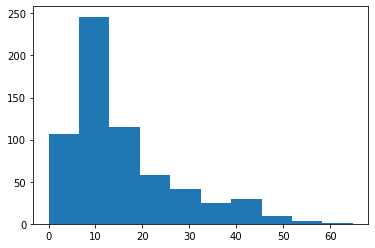

In [45]:
plt.hist(branches['rMuonChi2'])

In [60]:
branches['rLeadingShowerE']
#branches['rMuonChi2']

<Array [0.193, -5, 0.849, ... -5, 0.25, 0.595] type='634 * float64'>